## M345SC Lab 2

The course bitbucket repo has been updated a few times in the last week. Ensure that you can sync your online fork of the repo. If/when using git on MLC machines, you should first launch *tortoise git* from the software hub, and then you will be provided with git options when right-clicking on a file or folder

#### Task 1: Timing code

There are a few different approaches for timing code in Python.
You can use the *time* function in the time module as below:

In [2]:
import numpy as np
import time
X = list(np.random.randint(1,1000,800)) #uncomment and use if/as needed
t1 = time.time()
y = np.sin(np.outer(X,X))
t2 = time.time()
print("dt = ",t2-t1)

dt =  0.030570507049560547


And you can also use the timeit function:

In [3]:
timeit np.sin(np.outer(X,X))

19 ms ± 789 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


You will now investigate how the runing time for sorting algorithms depends on the list length. Functions for merge and insertion sorts are below.

In [4]:
def isort(X):
    """Sort X using insertion sort algorithm and return sorted array
    """

    S = X.copy()

    for i,x in enumerate(X[1:],1):
        #place x appropriately in partially sorted array, S
        for j in range(i-1,-1,-1):
            if S[j+1]<S[j]:
                S[j],S[j+1] = S[j+1],S[j]
            else:
                break
    return S

def merge(L,R):
    """Merge 2 sorted lists provided as input
    into a single sorted list
    """
    M = [] #Merged list, initially empty
    indL,indR = 0,0 #start indices
    nL,nR = len(L),len(R)

    #Add one element to M per iteration until an entire sublist
    #has been added
    for i in range(nL+nR):
        if L[indL]<R[indR]:
            M.append(L[indL])
            indL = indL + 1
            if indL>=nL:
                M.extend(R[indR:])
                break
        else:
            M.append(R[indR])
            indR = indR + 1
            if indR>=nR:
                M.extend(L[indL:])
                break
    return M

def mergesort(X):
    """Given a unsorted list, sort list using
    merge sort algorithm and return sorted list
    """

    n = len(X)

    if n==1:
        return X
    else:
        L = mergesort(X[:n//2])
        R = mergesort(X[n//2:])
        return merge(L,R)

1) How much does the run-time for insertion sort increase when the length of the initial, unsorted list is doubled? What do you expect?

run_time = 0.0014073848724365234
run_time = 0.003521442413330078
run_time = 0.010753393173217773
run_time = 0.027074337005615234
run_time = 0.07811570167541504
run_time = 0.26961326599121094
run_time = 1.029386281967163
run_time = 3.9652552604675293
run_time = 15.952673196792603


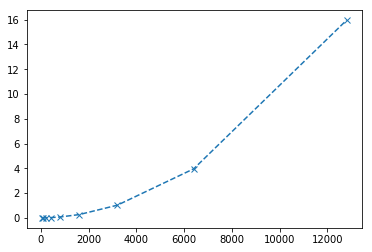

In [14]:
#Add code below
import matplotlib.pyplot as plt
import time
import numpy as np
N = [50,100,200,400,800,1600,3200,6400,12800]
times = np.zeros(len(N))
for i in range(len(N)):
    X[i] = np.random.randint(1,2*N[i],N[i])
    t1 = time.time()
    Z = isort(X[i])
    t2 = time.time()
    times[i] = t2 - t1
    print('run_time =', t2-t1 )
    Z
    
plt.plot(N,times,'--x')



2) Now carry out the analagous analysis for mergesort.

run_time = 0.00035262107849121094
run_time = 0.0006873607635498047
run_time = 0.0013840198516845703
run_time = 0.0023636817932128906
run_time = 0.004294633865356445
run_time = 0.007684230804443359
run_time = 0.014324665069580078
run_time = 0.028994083404541016
run_time = 0.051477909088134766


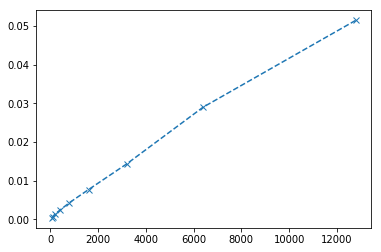

In [15]:
#Add code below
import matplotlib.pyplot as plt
import time
import numpy as np
N = [50,100,200,400,800,1600,3200,6400,12800]
times = np.zeros(len(N))
for i in range(len(N)):
    X[i] = np.random.randint(1,2*N[i],N[i])
    t1 = time.time()
    Z = mergesort(X[i])
    t2 = time.time()
    times[i] = t2 - t1
    print('run_time =', t2-t1 )
    Z
    
plt.plot(N,times,'--x')

In [ ]:
#Add code below
import time
import numpy as np
N = [5,10,15,20,25,30,35,40,45,50]
for i in range(len(N)):
    X[i] = np.random.randint(1,2*N[i],N[i])
    t1 = time.time()
    Z = mergesort(X[i])
    t2 = time.time()
    print('run_time =', t2-t1 )
    Z

3) Consider one *level* of mergesort where *m* sorted lists of length *p* are merged into *m/2* lists of length *2p* (assume that *m* is even), and we have $N = mp$. In lecture, the running time for one level was stated to be $O(N)$. This indicates the number of required operations is: $cN + f(N)$ with $lim_{n\rightarrow \infty} f/N = 0$ and $c$ a constant independent of N. Construct an (useful) upper bound for $c$. Does this bound depend on *m* or *p*?

####  Task 2: Setting up a word count
In this task, you will place the words from a text file into a Python dictionary so that word counts for specified words can be quickly extracted. The line below will read in the file (if the notebook and the text file, *words.txt*, are in the same directory).

In [1]:
infile = open('words.txt','r')
A = infile.read()
#Remove punctuation
A = A.replace(',','')
A = A.replace('?','')
A = A.replace('.','')
A = A.replace('!','')
A = A.lower() #Convert to all lowercase
words = A.split() #List (mostly) containing the words in the file
print(words[:4])
infile.close()

['sing', 'michael', 'sing', 'on']


1) Fill the dictionary below so that each word in *words* is stored as a key and the corresponding value is the number of times the word appears in the list. If you are unfamiliar with dictionaries in Python, have a look at the online tutorial: https://docs.python.org/3/tutorial/datastructures.html#dictionaries

In [ ]:
D = {} #Initializes empty dictionary
#Add code below

2) Using your dictionary, look up how many times does the word "fail" appears in the file? (you can check your result by applying the *count* method on *words*)

3) In general (i.e. not specifically for this file) what are the running times for a) creating the dictionary and b) looking up a word count in the dictionary?